In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import AbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from pandas.core.common import random_state
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from collections import Counter

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\Python\Datasets\Dry_Bean.csv")

In [3]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
data["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [7]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
l=LabelEncoder()
data["Class"]=l.fit_transform(data["Class"])
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [9]:
data["Class"].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [10]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.481099
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.031184
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.321283


<AxesSubplot:>

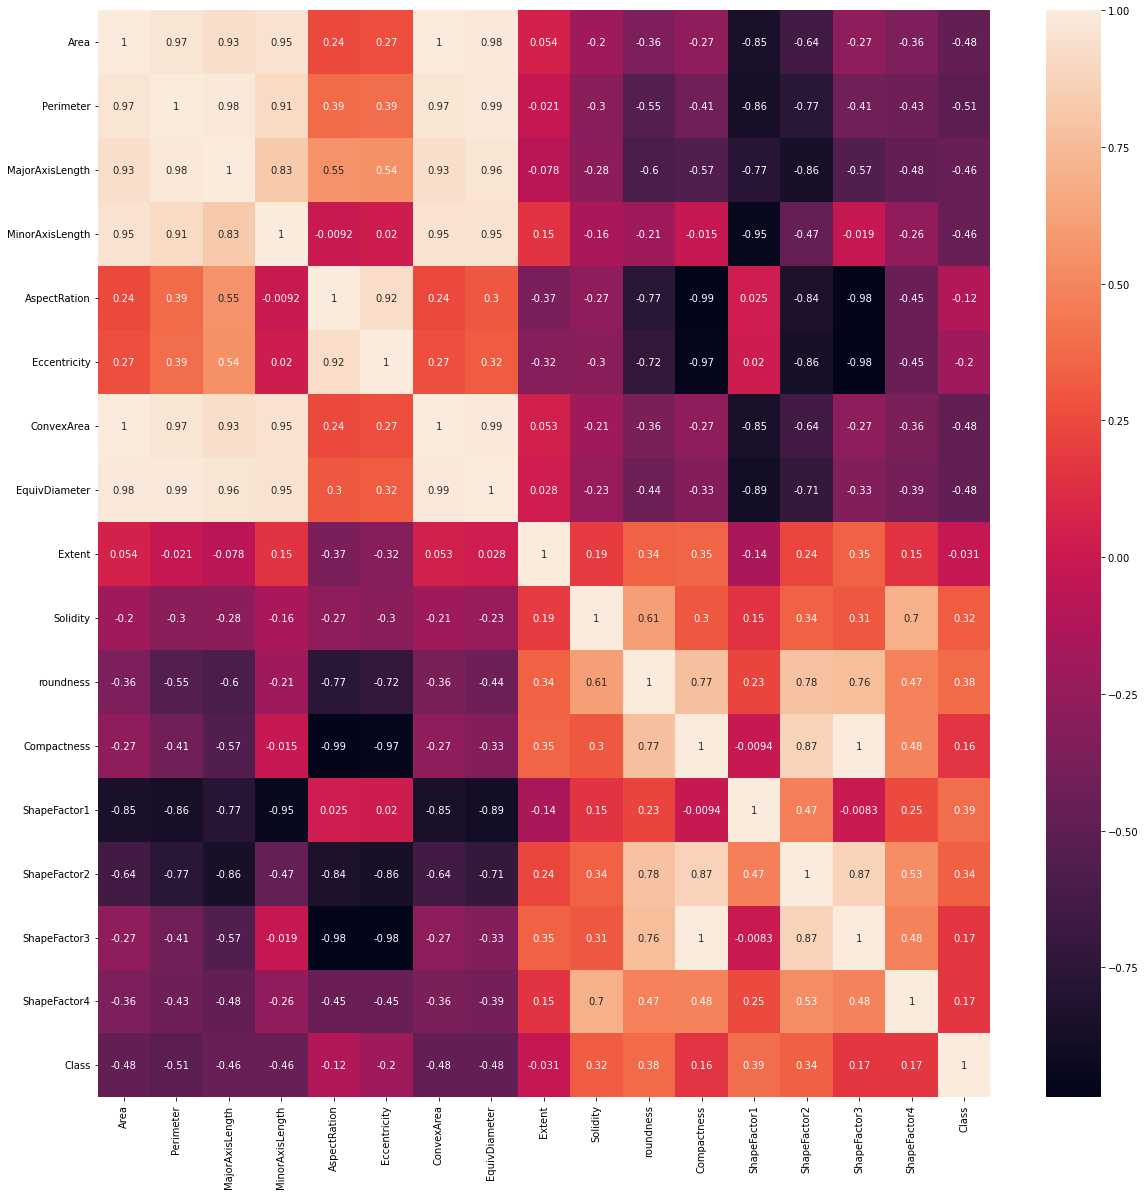

In [11]:
plt.figure(figsize=[20,20])
sns.heatmap(data.corr(),annot=True)

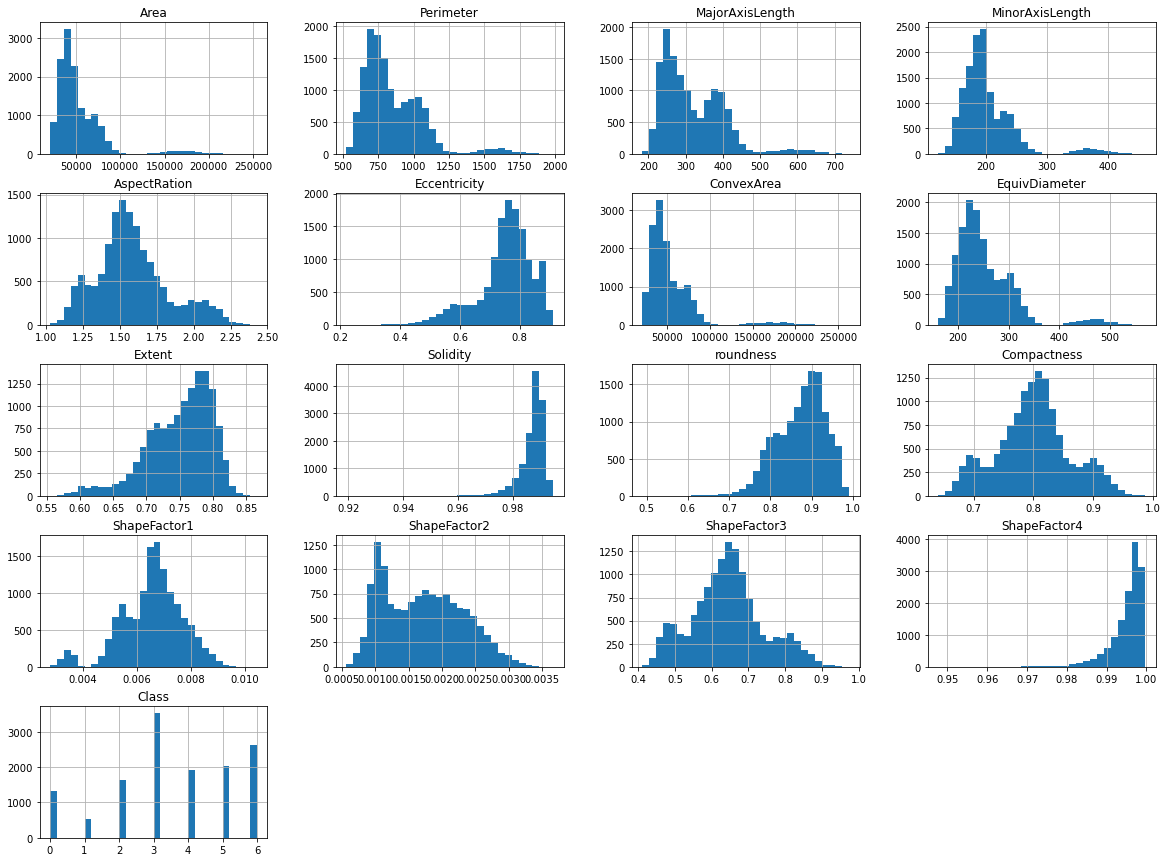

In [12]:
data.hist(bins=30,figsize=[20,15])
plt.show()

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [14]:
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [15]:
mn=MinMaxScaler()
x_data=mn.fit_transform(x_data)

In [16]:
x_data

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.83304873, 0.75099637,
        0.98061988],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.96731556, 0.88498696,
        0.97497943],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.80094221, 0.7361995 ,
        0.98719586],
       ...,
       [0.12316057, 0.21322526, 0.25325607, ..., 0.28442303, 0.33040449,
        0.93995183],
       [0.07777374, 0.15495845, 0.18144243, ..., 0.36272351, 0.35355757,
        0.94460815],
       [0.10508109, 0.18202629, 0.19751549, ..., 0.39400455, 0.45425278,
        0.94017614]])

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=51)

In [18]:
l1=LogisticRegression(random_state=59)
l1.fit(x_train,y_train)
log_pred=l1.predict(x_test)
log_acc=accuracy_score(log_pred,y_test)*100
print("Accuracy of logistic regression: ",log_acc)

Accuracy of logistic regression:  93.84987243185175


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
nb_acc=accuracy_score(y_test,nb_pred)*100
print("Naive_bayes Accuracy: ",nb_acc)

Naive_bayes Accuracy:  91.55364576339466


In [20]:
svm=SVC(kernel="linear",random_state=57)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_acc=accuracy_score(y_test,svm_pred)*100
print("Accuracy_score of SVM: ",svm_acc)

Accuracy_score of SVM:  94.30643212031691


In [21]:
skf=StratifiedKFold(n_splits=5,random_state=53,shuffle=True)
skf.get_n_splits(x_data,y_data)

5

In [22]:
for train_data,test_data in skf.split(x_data,y_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    
    scores=cross_val_score(svm,x_train,y_train,cv=skf)
    y_pred=cross_val_predict(svm,x_test,y_test)
    
    print("Checking the balance: ",Counter(y_test))
    print(scores)
    print(y_pred)
    print(np.mean(scores)*100)

Checking the balance:  Counter({5: 710, 6: 710, 0: 709, 1: 709, 2: 709, 4: 709, 3: 709})
[0.93756294 0.94436052 0.94736842 0.94510199 0.94636112]
[5 5 5 ... 6 6 6]
94.41509985663939
Checking the balance:  Counter({0: 710, 3: 710, 5: 709, 1: 709, 2: 709, 4: 709, 6: 709})
[0.9398288  0.94008056 0.94157643 0.94258373 0.94535382]
[5 5 5 ... 6 6 6]
94.18846683774585
Checking the balance:  Counter({1: 710, 5: 709, 0: 709, 2: 709, 4: 709, 6: 709, 3: 709})
[0.94033233 0.94108761 0.94486405 0.93956182 0.94661294]
[5 5 5 ... 6 6 5]
94.24917509953204
Checking the balance:  Counter({2: 710, 5: 709, 0: 709, 1: 709, 4: 709, 6: 709, 3: 709})
[0.94108761 0.94360524 0.9478852  0.94686477 0.94560564]
[5 5 5 ... 6 6 6]
94.5009691360044
Checking the balance:  Counter({4: 710, 5: 709, 0: 709, 1: 709, 2: 709, 6: 709, 3: 709})
[0.93907351 0.93882175 0.94486405 0.9403173  0.9471166 ]
[5 5 5 ... 6 6 6]
94.20386421901182


In [23]:
for train_data,test_data in skf.split(x_data,y_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    
    scores=cross_val_score(nb,x_train,y_train,cv=skf)
    nb_pred=cross_val_predict(nb,x_test,y_test)
    
    print("Checking the balancing: ",Counter(y_test))
    print(scores)
    print(nb_pred)
    print(np.mean(scores)*100)

Checking the balancing:  Counter({5: 710, 6: 710, 0: 709, 1: 709, 2: 709, 4: 709, 3: 709})
[0.91616314 0.918429   0.91941576 0.92319315 0.92117854]
[5 5 5 ... 6 6 6]
91.96759208186847
Checking the balancing:  Counter({0: 710, 3: 710, 5: 709, 1: 709, 2: 709, 4: 709, 6: 709})
[0.918429   0.91968781 0.91891211 0.9236968  0.91765298]
[5 5 5 ... 6 6 6]
91.96757432980245
Checking the balancing:  Counter({1: 710, 5: 709, 0: 709, 2: 709, 4: 709, 6: 709, 3: 709})
[0.9164149  0.91666667 0.91792548 0.91916394 0.91689751]
[5 5 5 ... 6 6 5]
91.74136989650293
Checking the balancing:  Counter({2: 710, 5: 709, 0: 709, 1: 709, 4: 709, 6: 709, 3: 709})
[0.91717019 0.92069486 0.92195368 0.92092672 0.92017124]
[5 5 5 ... 6 6 6]
92.01833382658717
Checking the balancing:  Counter({4: 710, 5: 709, 0: 709, 1: 709, 2: 709, 6: 709, 3: 709})
[0.91490433 0.91515609 0.92598187 0.91463108 0.92420045]
[5 5 5 ... 6 6 6]
91.89747649309459


# Ensemble

In [26]:
Maxvot=VotingClassifier(estimators=[("SVM",svm),("Naive Bayes",nb)])
print(Maxvot)
Maxvot.fit(x_train,y_train)
Maxvot_pred=Maxvot.predict(x_test)
print("Maxvot_prediction:",Maxvot_pred)
max_acc=accuracy_score(Maxvot_pred,y_test)*100
print("Accuracy_score of maxvote:",max_acc)

VotingClassifier(estimators=[('SVM', SVC(kernel='linear', random_state=57)),
                             ('Naive Bayes', GaussianNB())])
Maxvot_prediction: [5 5 5 ... 6 6 6]
Accuracy_score of maxvote: 93.71474617244158


In [28]:
bag=BaggingClassifier(n_estimators=5,base_estimator=svm,random_state=51)
print(bag)
bag.fit(x_train,y_train)
bag_pred=bag.predict(x_test)
print("Bagging prediction: ",bag_pred)
bag_acc=accuracy_score(bag_pred,y_test)*100
print("Accuracy score of bagging: ",bag_acc)

BaggingClassifier(base_estimator=SVC(kernel='linear', random_state=57),
                  n_estimators=5, random_state=51)
Bagging prediction:  [5 5 5 ... 6 6 6]
Accuracy score of bagging:  94.54069298952457


# Classification report

In [30]:
class_report=classification_report(bag_pred,y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       681
           1       1.00      1.00      1.00       709
           2       0.97      0.96      0.96       715
           3       0.89      0.91      0.90       692
           4       0.97      0.97      0.97       706
           5       0.97      0.95      0.96       728
           6       0.89      0.86      0.87       733

    accuracy                           0.95      4964
   macro avg       0.95      0.95      0.95      4964
weighted avg       0.95      0.95      0.95      4964

